<a href="https://colab.research.google.com/github/AlvaroMorenoJimenez/CM2324/blob/main/TrabajoFinal_11052024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREÁMBULO (Importante ejecutar su código)

Este será el apartado donde vamos a incluir todos los códigos visto en clase y que vamos a emplear, de forma que los tengamos precargados en el cuaderno y podamos usarlos en celdas posteriores sin necesidad de vovler a crearlos.


## Bibliotecas


In [ ]:
# Imclusión de bibliotecas necesarias

import matplotlib.pyplot as plt
import numpy as np


## Funciones triangular() y trapezoidal()


In [ ]:
# Funciones triangular y trapezoidal

def triangular(in_val, values:tuple) -> float:
    """ Función que calcula una función de pertenencia triangular

        Args:
                in_val (float): El valor float para calcular su pertenencia.
                values (tuple): 3 valores float que definen la función de pertenencia

        Returns:
                float: valor de pertenencia de val al conjunto representado por valores.
    """
    if in_val<values[0]:
        return 0.0
    if in_val>=values[0] and in_val<=values[1]:
        if values[0]==values[1]:
            return 1.0
        return (in_val-values[0])/(values[1]-values[0])
    if in_val>values[1] and in_val<=values[2]:
        return (values[2]-in_val)/(values[2]-values[1])
    if in_val>values[2]:
        return 0.0

def trapezoidal(in_val, values:tuple) -> float:
    """ Función que calcula una función de pertenencia trapezoidal

        Args:
                in_val (float): El valor float para calcular su pertenencia.
                values (tuple): 4 valores float que definen la función de pertenencia

        Returns:
                float: valor de pertenencia de val al conjunto representado por valores.
    """
    if in_val<values[0]:
        return 0.0
    if in_val>=values[0] and in_val<values[1]:
        return (in_val-values[0])/(values[1]-values[0])
    if in_val>=values[1] and in_val<=values[2]:
        return 1
    if in_val>=values[2] and in_val<=values[3]:
        return (values[3]-in_val)/(values[3]-values[2])
    if in_val>values[3]:
        return 0


## Clase FuzzySet()


In [ ]:
""" Clase para manejar los terminos, especialmente en DocString"""
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np

################################
# COMIENZA LA CLASE FuzzySet IMPORTANTE: ANTES -> MembershipFS
################################

class FuzzySet():
    """ Clase para modelar una conjunto difuso

        Esta clase modela un conjunto difuso con cualquier tipo de función de
        pertenencia. Se debe pasar la función de pertenencia en la creación
        del objeto

        Attributes:
                nombre (str): str que contiene el nombre del conjunto.
                valores (tuple[float]): tuple de floats que definen el conjunto difuso.
                func_pert (Callable): función que calcula la pertenencia de los valores.
    """
    def __init__(self, name:str, function: Callable[[tuple],float], values:tuple):
        self.name = name
        self.values = values
        self.function = function


    # GETTERS
    def get_name(self) -> str:
        """Devuelve el nombre del MembershipFS.

        Args:
            None

        Returns:
            str.
        """
        return self.name


    def get_values(self) -> tuple[float]:
        """Devuelve los valores del MembershipFS.

        Args:
            None

        Returns:
            tuple of a indeterminate number of floats.
        """
        return self.values


    def get_membership(self) -> Callable:
        """Devuelve la función python utilizada como función de pertenencia.

        Args:
            None

        Returns:
            Callable.
        """
        return self.function


    #SETTERS
    def set_name(self, name:str) -> None:
        """Asigna el nombre del MembershipFS.

        Args:
            name: str.

        Returns:
            None.
        """
        self.name = name


    def set_values(self, values:tuple[float]) -> None:
        """Asigna los valores a utilizar por la función de pertenencia.

        Args:
            values: tuple of an indeterminate number of float.

        Returns:
            None.
        """
        self.values = values

    def set_func_pert(self, m_function:Callable[[tuple],float]) -> None:
        """Asigna la función python a utilizar como función de pertenencia.

        Args:
            m_function: función a utilizar, debe utilizar como parámetros
            una tupla de float y un valor float.

        Returns:
            None.
        """
        self.function = m_function

    # MÉTODOS PROPIOS
    def __str__(self) -> str:
        """Devuelve los atributos de esta clase como str.

         Args:
            None

        Returns:
                str.
        """
        return str(self.name) + ': ' + str(self.values)


    def membership_grade(self, in_val:float) -> float:
        """Calcula la pertenencia de in_val al conjunto difuso que modela esta clase
        según la función en self.function.

        Args:
                in_val (float): El valor float para calcular su pertenencia.

        Returns:
                float.
        """
        return self.function( in_val, self.values )


## Clase Variable()

In [ ]:
""" Clase padre de todos los tipos de variables"""
#from files.terms import MembershipFS

class Variable():
    """ Clase para modelar una variable de cualquier tipo. Es la clase padre
    de todas.

        Tendrá las componentes nombre.

        Attributes:
            name (str): str que contiene el nombre de la variable.
            support (tuple[float]): lista de 2 float que definen el dominio de la
            variable como un valor inferior del dominio y el superior como un
            intervalo cerrado.
            term (float): valor real del término.
    """
    def __init__(self, name:str, position: int):
        self.name = name
        self.position = position


    # GETTERS
    def get_name(self) -> str:
        """Devuelve el nombre de la variable lingüística.

        Args:
            None

        Returns:
            str.
        """
        return self.name


    def get_position(self) -> float:
        """ Devuelve la posicion en el lugar de entrada de la var. linguística.

        Args:
            None

        Returns:
            float.
        """
        return self.position

    # FUNCIONES PROPIAS
    def __str__(self) -> str:
        """Devuelve lesta clase como str.

        Args:
            None

        Returns:
            str.
        """
        return str(self.name) + '\n'


## Clase LinguisticV()

In [ ]:
class LinguisticV(Variable):
    """ Clase para modelar una variable lingüística

        Esta clase modela una variable lingüística reducida. No modela los 5 campos
        de la definición, pero sí es funcional para los problemas a tratar.

        Attributes:
            nombre (str): str que contiene el nombre de la variable.
            dominio (tuple[float]): lista de 2 float que definen el dominio de la
            variable como un valor inferior del dominio y el superior como un
            intervalo cerrado.
            CDs (list[CDifuso]): lista con los conjuntos difusos que forman los
            términos primarios.
    """
    def __init__(self, name:str, position: int, support:list[float], values:dict):
        Variable.__init__(self,name, position)
        self.support = support
        self.values = values


    # GETTERS
    def get_lower_support(self) -> float:
        """Devuelve el mínimo valor del dominio de la var. linguística.

        Args:
            None

        Returns:
            float.
        """
        return self.support[0]

    def get_upper_support(self) -> float:
        """ Devuelve el máximo valor del dominio de la var. linguística.

        Args:
            None

        Returns:
            float.
        """
        return self.support[1]


    def get_values(self) -> float:
        """Devuelve el termino primario de nombre "name".

        Args:
            None.

        Returns:
            float.
        """
        return self.values

    def get_fuzzy_set(self, name:str) -> FuzzySet:
        """Devuelve el termino primario de nombre "name".

        Args:
            name (str): nombre del FS a devolver.

        Returns:
            FuzzySet.
        """
        return self.values[name]

    # FUNCIONES PROPIAS
    def __str__(self) -> str:
        """Devuelve lesta clase como str.

        Args:
            None

        Returns:
            str.
        """
        chain = ''
        for elem in self.values:
            chain += '\n' + str(elem)
        return str(self.name) + ' ' + str(self.support) + ' ' + chain + '\n'

## Clase AtomicProposition()

In [ ]:
class AtomicProposition():
    """ Clase para modelar una proposición atómica

        Esta clase modela las proposiciones atómicas, por ejemplo:
        V es T

        Attributes:
            antecedent(LinguisticV): Variable Lingüística de la PDA.
            CL (CL): término primario de la PDA.
    """
    def __init__(self, variable:Variable, term:FuzzySet):
        self.variable = variable
        self.term = term

    # GETTERS
    def get_variable(self) -> Variable:
        """Devuelve la variable.

        Args:
            None

        Returns:
            Variable.
        """
        return self.variable

    def get_term(self) -> FuzzySet:
        """Devuelve el término primario.

        Args:
            None

        Returns:
            Term.
        """
        return self.term


    # GETTERS
    def set_variable(self, variable:Variable) -> None:
        """Devuelve la variable.

        Args:
            variable (Variable): variable a asignar.

        Returns:
            None
        """
        self.variable = variable

    def set_term(self, term:FuzzySet) -> None:
        """Devuelve el término independiente.

        Args:
            term(MembershipFS): conjunto (término) a asignar.

        Returns:
            None
        """
        self.term = term


## Clase FuzzyAP()


In [ ]:
class FuzzyAP(AtomicProposition):
    """ Clase para modelar una proposición difusa

        Esta clase modela las proposiciones difusas atómicas, por ejemplo:
        T es Fría

        Attributes:
            antecedent(LinguisticV): Variable Lingüística de la PDA.
            CL (CL): término primario de la PDA.
    """
    def __init__(self, variable:LinguisticV, term:FuzzySet):
        AtomicProposition.__init__(self, variable, term)


    # FUNCIONES PROPIAS
    def membership_grade(self, value:float) -> float:
        """Devuelve el valor de pertenencia de "value" al termino primario
        (conjunto difuso).

        Args:
            value(float): valor a calcular su pertenencia.

        Returns:
            float: valor de pertenencia
        """
        return self.get_term().membership_grade(value)


    def __str__(self) -> str:
        """Devuelve los atributos de esta clase como str.

        Args:
            None.

        Returns:
            str.
        """
        return str(self.get_variable().get_name()) + ' es ' + str(self.get_term().get_name())

# 1. Introducción
Nuestro caso a controlar, será la regulación de la posición de una válvula de salida de un depósito de líquido. De esta forma, nos guiaremos a partir de la entrada de agua al depósito, cuyo comportamiento explicaremos a continuación, junto con el nivel de depósito, que también se explicará su funcionamiento.

# 2. Entradas difusas

## 2.1 Entrada de agua

Partimos de que el depósito posee una entrada de agua, la cual no será controlada, de forma que puede existir un mayor o menor caudal de entrada a este.
Para modelar dicha entrada al sistema, se han desarrollado las siguientes etiquetas, de forma que el conjunto difuso nos quedaría de la siguiente manera.

*   Bajo
*   Medio
*   Alto

Con respecto a los rangos de cada etiqueta, vendrán dados por la siguiente gráfica.

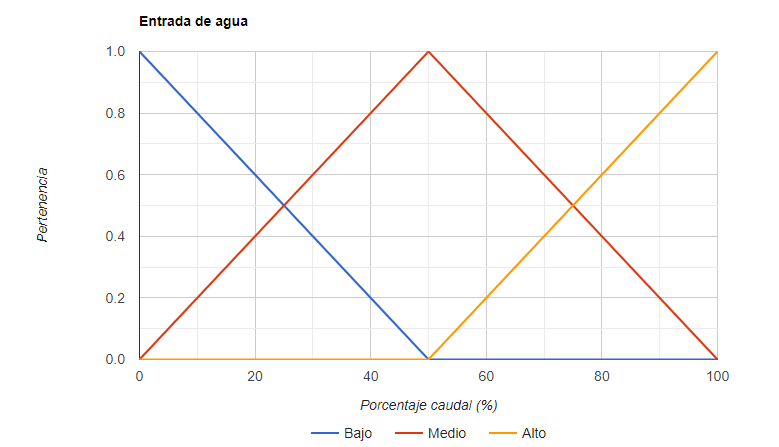


### 2.1.1 Código

Vamos a programar la varibale difusa entrada de agua, para lo que empleamos

In [ ]:
# Entrada de agua. Generamos VL a partir de diccionario 'entradaAgua'

entradaAgua = {
    'name': 'Entrada de agua',
    'type': 'fuzzy',
    'position': 1,
    'support': [0, 100],
    'sets': {
        'Bajo': FuzzySet('Bajo', triangular, (0, 0, 50)),
        'Medio': FuzzySet('Medio', triangular, (0, 50, 100)),
        'Alto': FuzzySet('Alto', triangular, (50, 100, 100))
    }
}

entradaAguaVL = LinguisticV(entradaAgua['name'],
                            entradaAgua['position'],
                            entradaAgua['support'],
                            entradaAgua['sets']
                            )

## 2.2 Nivel de agua

El nivel de agua, lo modelamos como si tuviésemos un dispositivo capaz de establecer el nivel de líquido, correspondiéndose así con diferentes valores entre 0-10.

Para modelar dicha entrada al sistema, se han desarrollado las siguientes etiquetas, de forma que el conjunto difuso nos quedaría de la siguiente manera.

*   Vacio
*   Semivacio
*   Medio
*   Semilleno
*   Lleno

Con respecto a los rangos de cada etiqueta, vendrán dados por la siguiente gráfica.
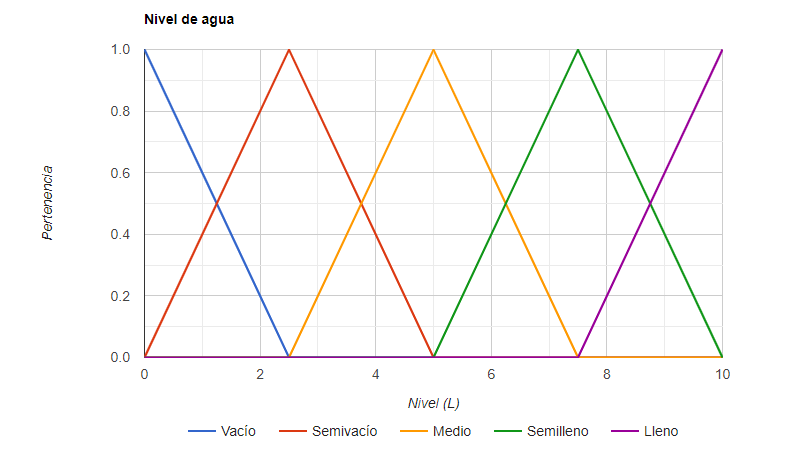


### 2.2.1 Código
Vamos a programar la varibale difusa entrada de agua, para lo que empleamos

In [ ]:
# Nivel de agua. Generamos VL a partir de diccionario 'nivelAgua'

nivelAgua = {
    'name': 'Nivel de agua',
    'type': 'fuzzy',
    'position': 2,
    'support': [0, 10],
    'sets': {
        'Vacio': FuzzySet('Vacio', triangular, (0, 0, 2.5)),
        'Semivacio': FuzzySet('Semivacio', triangular, (0, 2.5, 5)),
        'Medio': FuzzySet('Medio', triangular, (2.5, 5, 7.5)),
        'Semilleno':FuzzySet('Semilleno', triangular, (5, 7.5, 10)),
        'Lleno':FuzzySet('Lleno',triangular,(7.5, 10, 10))
    }
}

nivelAguaVL = LinguisticV(nivelAgua['name'],
                          nivelAgua['position'],
                          nivelAgua['support'],
                          nivelAgua['sets']
                          )


# 3. Salidas difusas




## 3.1 Posición válvula

La salida de nuestro sistema será cómo se posiciona la válvula que controla la salida, de forma que hemos decidido establecer etiquetas para cada posición de la válvula. Las etiquetas se corresponden con las posiciones de la imagen asociada.

* a (cerrada)
* b (1/2 abierta)
* c (3/4 abierta)
* d (totalmente abierta)

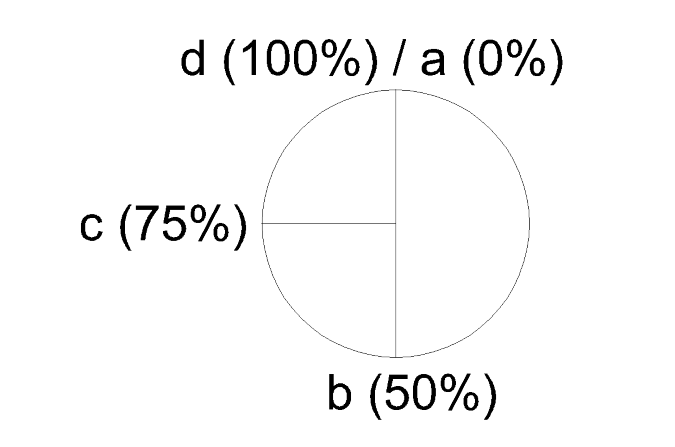

In [ ]:
valvula = {
    'name': 'Posición válvula',
    'type': 'fuzzy',
    'position': 3,
    'support': [0, 100],
    'sets': {
        'a': FuzzySet('a', trapezoidal, (0, 0, 50, 60)),
        'b': FuzzySet('b', triangular, (50, 60, 70)),
        'c': FuzzySet('c', triangular, (60, 70, 80)),
        'd':FuzzySet('d', trapezoidal, (70, 80, 90, 90))
    }
}

valvulaVL = LinguisticV(valvula['name'],
                        valvula['position'],
                        valvula['support'],
                        valvula['sets']
                            )